In [1]:
from   astropy.table         import Table
import pylab                 as pl
import numpy                 as np
import pandas                as pd
import os
from   astropy.io            import fits
from   glob                  import glob
from   desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from   scipy.spatial         import KDTree

In [2]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

In [3]:
data = Table.read('../../data/gama_gold_ddp.fits')

In [4]:
# data.keys()

In [5]:
ra_gama   = data['RA']
dec_gama  = data['DEC']
z_gama    = data['ZGAMA']

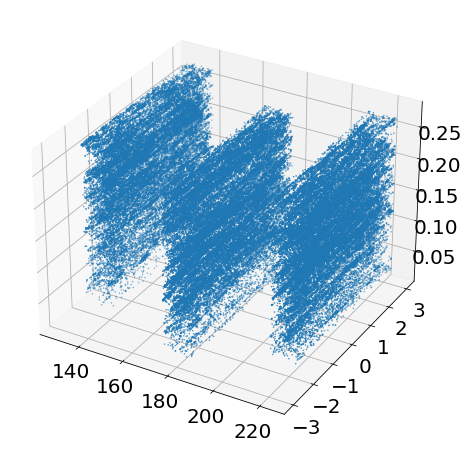

In [6]:
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ax.scatter(ra_gama, dec_gama, z_gama, s=0.3)
pl.show()

In [7]:
flavour = 'bright'
if flavour == 'bright':
    df_des = pd.read_csv('./data/DR9_BGSBRIGHT_data.csv')
else:
    df_des = pd.read_csv('./data/DR9_LRG_data.csv')

In [8]:
df_des

,ID,RA,DEC,TARGETID,E1,E2,E,R,BA,PHI
0,0.0,50.011807,4.269976,3.962789e+16,-0.084959,0.027257,0.089225,8.166371,0.836168,1.415570
1,1.0,50.012495,4.272378,3.962789e+16,0.119907,0.275814,0.300751,5.883485,0.537574,0.580353
2,2.0,48.823746,3.321716,3.962786e+16,0.319423,-0.230888,0.394132,3.539613,0.434584,-0.312941
3,3.0,48.828541,3.322617,3.962786e+16,0.146669,-0.053680,0.156183,1.425742,0.729830,-0.175425
4,4.0,48.833968,3.362724,3.962786e+16,0.125419,-0.142682,0.189968,2.078933,0.680717,-0.424851
...,...,...,...,...,...,...,...,...,...,...
14657732,14657732.0,117.867267,35.543613,3.963299e+16,-0.081000,0.073403,0.109311,1.151423,0.802921,1.202679
14657733,14657733.0,117.913651,35.584523,3.963299e+16,0.007894,0.223379,0.223519,1.128110,0.634629,0.767736
14657734,14657734.0,117.918243,35.539066,3.963299e+16,-0.238178,-0.519580,0.571570,3.060961,0.272613,-1.000309
14657735,14657735.0,117.956709,35.543084,3.963299e+16,-0.007017,0.383459,0.383523,0.985896,0.445585,0.794547


In [9]:
ra_des  = df_des['RA']
dec_des = df_des['DEC']

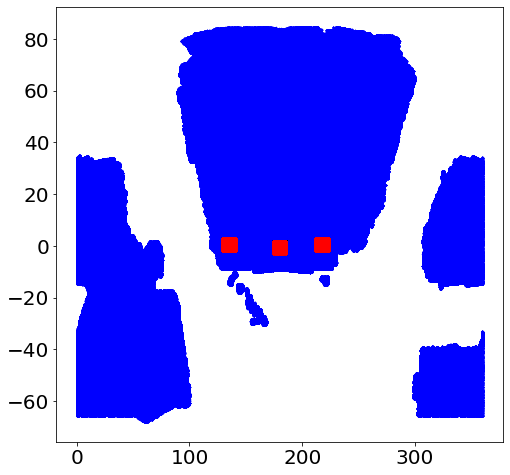

In [10]:
fig = pl.figure(figsize=(8,8))
pl.scatter(ra_des,  dec_des,  s=0.3, c='b')
pl.scatter(ra_gama, dec_gama, s=0.3, c='r')
pl.show()

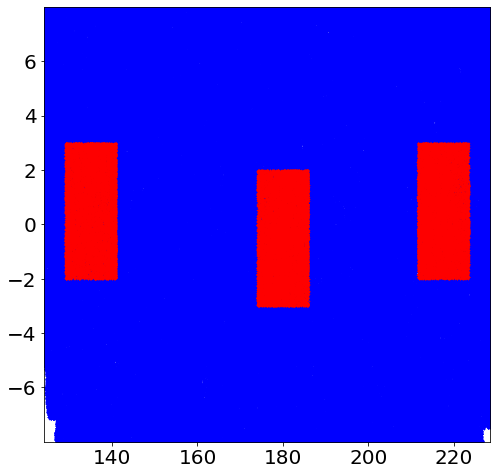

In [11]:
fig = pl.figure(figsize=(8,8))
pl.scatter(ra_des,  dec_des,  s=0.3, c='b')
pl.scatter(ra_gama, dec_gama, s=0.3, c='r')
pl.xlim(min(ra_gama)-5,max(ra_gama)+5)
pl.ylim(min(dec_gama)-5,max(dec_gama)+5)
pl.show()

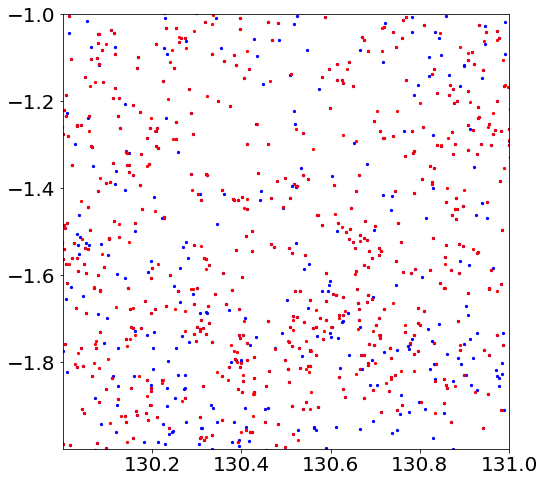

In [12]:
fig = pl.figure(figsize=(8,8))
pl.scatter(np.around(ra_des,  3), np.around(dec_des,  3), s=5, c='b')
pl.scatter(np.around(ra_gama, 3), np.around(dec_gama, 3), s=5, c='r')
pl.xlim(min(ra_gama)+1,min(ra_gama)+2)
pl.ylim(min(dec_gama)+1,min(dec_gama)+2)
pl.show()

In [13]:
tree = KDTree(np.c_[ra_des, dec_des])

In [14]:
distances, indices = tree.query(np.c_[ra_gama, dec_gama], k=1)

In [15]:
len(indices)

121975

In [16]:
len(ra_gama)

121975

(array([9.7597e+04, 8.6990e+03, 7.3370e+03, 4.5060e+03, 2.4030e+03,
        9.5700e+02, 3.1100e+02, 1.2300e+02, 3.1000e+01, 1.1000e+01]),
 array([7.05795303e-08, 7.51366696e-03, 1.50272633e-02, 2.25408597e-02,
        3.00544561e-02, 3.75680525e-02, 4.50816489e-02, 5.25952452e-02,
        6.01088416e-02, 6.76224380e-02, 7.51360344e-02]),
 <BarContainer object of 10 artists>)

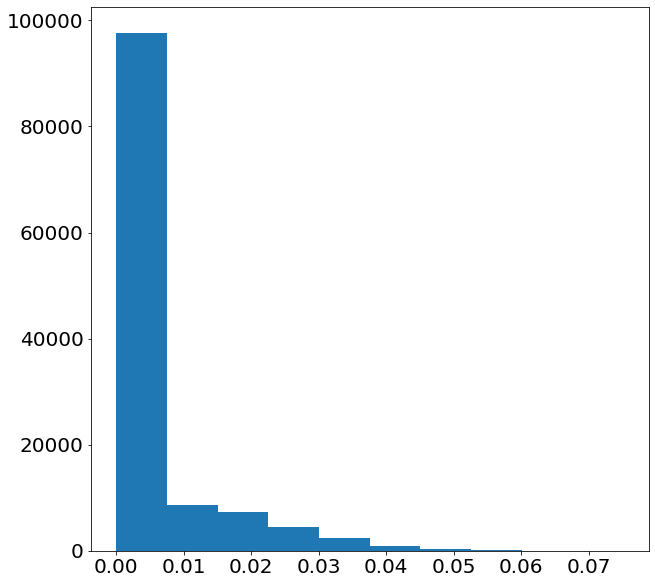

In [17]:
pl.hist(distances)

In [18]:
np.shape(indices), indices[0]

((121975,), 8259360)

In [19]:
df_des.iloc[indices]

,ID,RA,DEC,TARGETID,E1,E2,E,R,BA,PHI
8259360,8259360.0,138.241044,1.389790,3.962782e+16,-0.118534,-0.144397,0.186818,1.579568,0.685179,-1.129072
8048618,8048618.0,175.447698,0.101483,3.962779e+16,-0.183436,0.181817,0.258276,1.227511,0.589476,1.180313
7508779,7508779.0,215.743360,0.113722,3.962779e+16,0.192794,0.274709,0.335611,0.831682,0.497442,0.479428
7513186,7513186.0,217.206162,0.625468,3.962781e+16,0.276277,0.107599,0.296491,2.547027,0.542626,0.185693
6863995,6863995.0,133.786342,-0.477461,3.962777e+16,0.321978,0.295408,0.436962,1.637032,0.391825,0.371194
...,...,...,...,...,...,...,...,...,...,...
7491850,7491850.0,220.540384,0.440204,3.962780e+16,-0.004174,0.023976,0.024337,1.300240,0.952483,0.871580
7510144,7510144.0,216.369711,0.175900,3.962779e+16,0.643041,0.255638,0.691992,2.672667,0.182039,0.189194
12306559,12306559.0,137.391454,2.571390,3.962785e+16,0.009154,-0.006745,0.011371,1.771071,0.977513,-0.317510
7591914,7591914.0,212.393110,1.437418,3.962782e+16,-0.248450,-0.348727,0.428180,1.257258,0.400384,-1.094914


In [20]:
# df_match = pd.DataFrame( df_des.iloc[indices], data )
# df_match

In [21]:
len(data)

121975

In [22]:
len(df_des.iloc[indices])

121975

In [83]:
data_match = data.copy()

In [84]:
df_des.keys()

Index(['ID', 'RA', 'DEC', 'TARGETID', 'E1', 'E2', 'E', 'R', 'BA', 'PHI'], dtype='object')

In [85]:
# data_match['FIELD']               = np.array(data['FIELD'], dtype=str)
data_match['RA_DES']              = df_des['RA'].iloc[indices]
data_match['DEC_DES']             = df_des['DEC'].iloc[indices]
data_match['TARGETID_DES']        = np.array(df_des['TARGETID'].iloc[indices], dtype=int)
data_match['E1_DES']              = df_des['E1'].iloc[indices]
data_match['E2_DES']              = df_des['E2'].iloc[indices]
data_match['E_DES']               = df_des['E'].iloc[indices]
data_match['R_DES']               = df_des['R'].iloc[indices]
data_match['BA_DES']              = df_des['BA'].iloc[indices]
data_match['PHI_DES']             = df_des['PHI'].iloc[indices]
data_match['DISTANCE_MATCH_DES']  = distances

In [86]:
data_match.keys()

['CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'ZSURV',
 'LUMDIST',
 'DISTMOD',
 'FIELD',
 'IN_D8LUMFN',
 'CONSERVATIVE',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'GMR',
 'DETMAG',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QZERO',
 'Z_THETA_QCOLOR',
 'DDPKCORR_R0P1',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_G0P0',
 'DDPMALL_0P0',
 'DELTA_DETMAG_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_DETMAG_BRIGHT',
 'ZMIN',
 'ZMIN_WARN',
 'VMAX',
 'DDP',
 'DDPZLIMS',
 'STEPWISE_FAINTLIM_0P0',
 'STEPWISE_BRIGHTLIM_0P0',
 'RA_DES',
 'DEC_DES',
 'TARGETID_DES',
 'E1_DES',
 'E2_DES',
 '

In [87]:
data_match.write('./data/gamades_gold_ddp.fits', overwrite=True)

In [88]:
data_match.info

<Table length=121975>
         name           dtype  shape unit    class     n_bad
---------------------- ------- ----- ---- ------------ -----
                CATAID   int32            MaskedColumn     0
                 OBJID   int64            MaskedColumn     0
                    RA float64        deg       Column     0
                   DEC float64        deg       Column     0
               R_PETRO float32        mag       Column     0
                 ZGAMA float32                  Column     0
                    NQ   int16            MaskedColumn     0
                SPECID bytes33                  Column     0
          SURVEY_CLASS   int16            MaskedColumn     0
        UMAG_DRED_SDSS float32        mag       Column     0
        GMAG_DRED_SDSS float32        mag       Column     0
        RMAG_DRED_SDSS float32        mag       Column     0
        IMAG_DRED_SDSS float32        mag       Column     0
        ZMAG_DRED_SDSS float32        mag       Column     0
  

In [89]:
ii_ddp1 = data_match['DDP'][:,0] == 1
sum(ii_ddp1), len(ii_ddp1)

(50872, 121975)

In [90]:
ii_distance = data_match['DISTANCE_MATCH_DES'] < 0.0001
sum(ii_distance)

88976

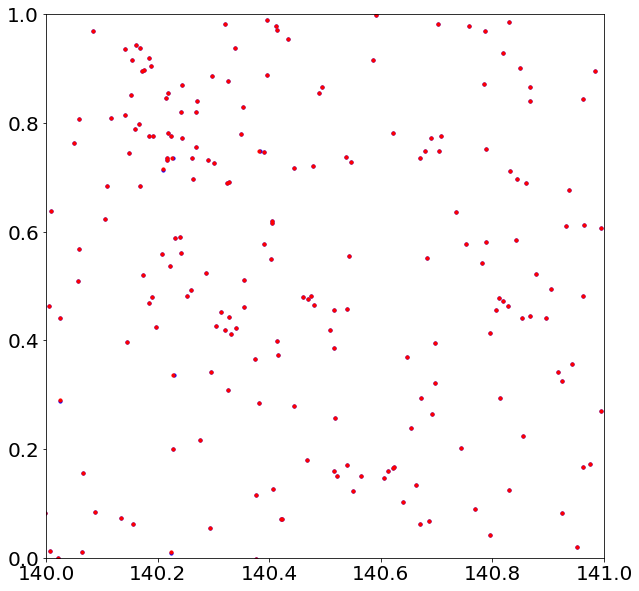

In [91]:
pl.scatter( data_match['RA'][ii_ddp1 & ii_distance], data_match['DEC'][ii_ddp1 & ii_distance], s=10, c='b' )
pl.scatter( data_match['RA_DES'][ii_ddp1 & ii_distance], data_match['DEC_DES'][ii_ddp1 & ii_distance], s=10, c='r')
pl.xlim(140,141)
pl.ylim(0,1)
pl.show()

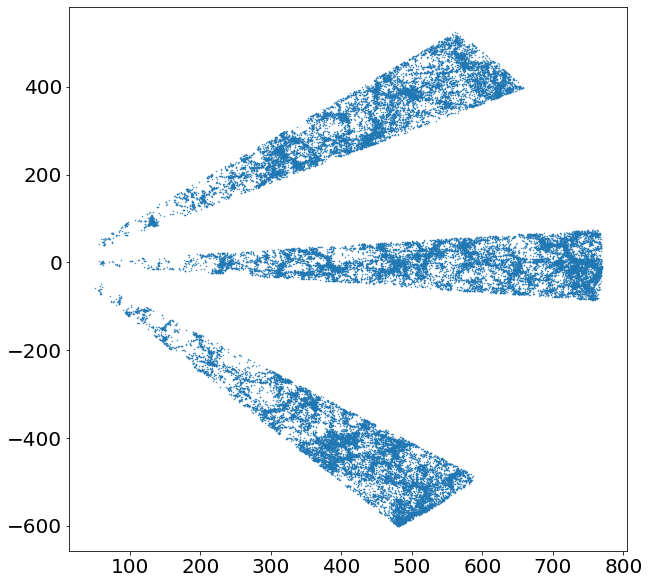

In [92]:
pl.scatter( data_match['ROTCARTESIAN_X'][ii_ddp1 & ii_distance], data_match['ROTCARTESIAN_Y'][ii_ddp1 & ii_distance], s=0.2 )
pl.show()

In [94]:
ii_g15 = data_match['FIELD'] == 'G15'
sum(ii_g15)

41178

In [95]:
idx = np.arange(0,sum( ii_ddp1 & ii_distance & ii_g15 ))
idx

array([    0,     1,     2, ..., 13914, 13915, 13916])

In [96]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
df_pos = df_pos[ii_ddp1 & ii_distance & ii_g15]
df_pos

,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
10,376.361051,259.703020,-14.427125
24,609.593909,452.947333,-16.324600
31,405.860384,283.908626,4.539176
53,467.229273,373.702543,-10.689510
63,481.288111,325.743350,10.289737
...,...,...,...
121905,407.589286,340.443790,-12.238181
121914,315.898864,247.876021,-13.606974
121929,276.450757,210.851126,0.188152
121933,358.783727,226.700636,8.862379
